In [28]:
import pandas as pd
import numpy as np
from tkinter import *
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import system
from sklearn import metrics

In [29]:
data=pd.read_csv('food.csv')

Breakfastdata=data['Breakfast'] 
BreakfastdataNumpy=Breakfastdata.to_numpy() 

Lunchdata=data['Lunch']
LunchdataNumpy=Lunchdata.to_numpy()
    
Dinnerdata=data['Dinner']
DinnerdataNumpy=Dinnerdata.to_numpy()

Food_itemsdata=data['Food_items']

In [30]:
def calculateNutrients():
    foodConsumed = e4.get()
    for i in range(len(Food_itemsdata)):
        if(foodConsumed.lower() == Food_itemsdata[i].lower()):
            nutrientsConsumed = data.iloc[i]
            caloriesConsumed = int(data.iloc[i][5])
        else:
            caloriesConsumed = 0
    return caloriesConsumed

In [31]:
def show_entry_fields():
    print("\nAge: %s\nHeight: %s kg\nWeight: %s cm\n" % (e1.get(),e2.get(), e3.get()))

In [32]:
def BmiAgeCls():
    age=int(e1.get())
    height=float(e2.get())
    weight=float(e3.get())

    bmi = weight/((height/100)**2) 
    agewiseinp=0

    for lp in range (0,100,20):
        test_list=np.arange(lp,lp+20)
        for i in test_list: 
            if(i == age):
                tr=round(lp/20)  
                agecl=round(lp/20) 

    if ( bmi < 16):
        print("Acoording to your BMI, you are Severely Underweight")
        clbmi=4
    elif ( bmi >= 16 and bmi < 18.5):
        print("Acoording to your BMI, you are Underweight")
        clbmi=3
    elif ( bmi >= 18.5 and bmi < 25):
        print("Acoording to your BMI, you are Healthy")
        clbmi=2
    elif ( bmi >= 25 and bmi < 30):
        print("Acoording to your BMI, you are Overweight")
        clbmi=1
    elif ( bmi >=30):
        print("Acoording to your BMI, you are Severely Overweight")
        clbmi=0

    ti=(clbmi+agecl)/2

    return agecl, clbmi, ti

In [33]:
def breakfastRecommender():
    show_entry_fields()

    breakfastfoodseparated=[]
    breakfastfoodseparatedID=[]

    for i in range(len(Food_itemsdata)):
        if (BreakfastdataNumpy[i]==1):
            breakfastfoodseparated.append( Food_itemsdata[i] )
            breakfastfoodseparatedID.append(i)

    breakfastfoodseparatedIDdata = data.iloc[breakfastfoodseparatedID] 
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.T 
    val=list(np.arange(5,10)) 
    Valapnd=[0]+val 
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.iloc[Valapnd]
    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.T

    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.to_numpy()

    Datacalorie=breakfastfoodseparatedIDdata[:,1:]
    X = np.array(Datacalorie)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    XValu=np.arange(0,len(kmeans.labels_))
    brklbl=kmeans.labels_

    datafin=pd.read_csv('nutrition-dataset-brk.csv')
    dataTog=datafin.T

    breakfastcat = dataTog.iloc[[1,2,3,4]]
    breakfastcat=breakfastcat.T
    breakfastcatDdata=breakfastcat.to_numpy()

    breakfastfin=np.zeros((len(breakfastcat)*5,6),dtype=np.float32)

    t=0
    yt=[]

    bmicls=[0,1,2,3,4]
    agecls=[0,1,2,3,4]

    agecl, clbmi, ti = BmiAgeCls()

    caloriesConsumed = calculateNutrients()

    for i in range(5):
        for j in range(len(breakfastcat)):
            valloc=list(breakfastcat.iloc[j])
            valloc.append(bmicls[i])
            valloc.append(agecls[i])
            breakfastfin[t]=np.array(valloc)
            yt.append(brklbl[j])
            t+=1

    X_test=np.zeros((len(breakfastcat),6),dtype=np.float32)

    for j in range(len(breakfastcat)):
        valloc=list(breakfastcat.iloc[j])
        valloc.append(agecl)
        valloc.append(clbmi)
        X_test[j]=np.array(valloc)*ti

    X_train=breakfastfin
    y_train=yt

    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)


    np.random.shuffle(breakfastfoodseparatedIDdata)

    print ('BREAKFAST DIET PLAN:\n')

    caloriesToBeConsumed = 300 - caloriesConsumed
    calorieSum = 0
    counter = 1
    for i in range(len(y_pred)):
        if y_pred[i]==2 or y_pred[i]==0:  
            calorieSum += int(breakfastfoodseparatedIDdata[i][1])
            if(calorieSum>250):
                break
            print(str(counter)+".","Name: ",breakfastfoodseparatedIDdata[i][0])
            print("  ","Calories: ",breakfastfoodseparatedIDdata[i][1], "cal")
            print("  ","Fats: ",breakfastfoodseparatedIDdata[i][2],"g")
            print("  ","Protiens: ",breakfastfoodseparatedIDdata[i][3],"g")
            print("  ","Carbohydrates: ",breakfastfoodseparatedIDdata[i][4],"g")
            print("  ","Fibre: ",breakfastfoodseparatedIDdata[i][5],"g")
            counter +=1
            img = mpimg.imread('./foodimg/{}.jpeg'.format(str(breakfastfoodseparatedIDdata[i][0])))
            plt.axis("off")
            imgplot = plt.imshow(img)
            plt.show()

In [34]:
def lunchRecommender():
    show_entry_fields()
    Lunchfoodseparated=[]
    LunchfoodseparatedID=[]

    for i in range(len(Food_itemsdata)):
        if (LunchdataNumpy[i]==1):
            Lunchfoodseparated.append(Food_itemsdata[i])
            LunchfoodseparatedID.append(i)

    LunchfoodseparatedIDdata = data.iloc[LunchfoodseparatedID]
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.T
    val=list(np.arange(5,10))
    Valapnd=[0]+val
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.iloc[Valapnd]
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.T
    
    LunchfoodseparatedIDdata=LunchfoodseparatedIDdata.to_numpy()

    Datacalorie=LunchfoodseparatedIDdata[:,1:]
    X = np.array(Datacalorie)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    XValu=np.arange(0,len(kmeans.labels_))
    lnchlbl=kmeans.labels_
    datafin=pd.read_csv('nutrition-dataset-lnc.csv')
    dataTog=datafin.T
    lunchcat = dataTog.iloc[[1,2,3,4]]
    lunchcat=lunchcat.T
    lunchcatDdata=lunchcat.to_numpy()

    lunchfin=np.zeros((len(lunchcat)*5,6),dtype=np.float32)

    t=0
    yt=[]

    bmicls=[0,1,2,3,4]
    agecls=[0,1,2,3,4]

    agecl, clbmi, ti = BmiAgeCls()

    caloriesConsumed = calculateNutrients()

    for i in range(5):
        for j in range(len(lunchcat)):
            valloc=list(lunchcat.iloc[j])
            valloc.append(bmicls[i])
            valloc.append(agecls[i])
            lunchfin[t]=np.array(valloc)
            yt.append(lnchlbl[j])
            t+=1

    X_test=np.zeros((len(lunchcat),6),dtype=np.float32)

    for j in range(len(lunchcat)):
        valloc=list(lunchcat.iloc[j])
        valloc.append(agecl)
        valloc.append(clbmi)
        X_test[j]=np.array(valloc)*ti

    X_train=lunchfin
    y_train=yt

    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)


    np.random.shuffle(LunchfoodseparatedIDdata)

    print ('LUNCH DIET PLAN:\n')

    caloriesToBeConsumed = 500 - caloriesConsumed
    calorieSum = 0
    counter = 1
    for i in range(len(y_pred)):
        if y_pred[i]==2 or y_pred[i]==0:  
            #lunch
            calorieSum += int(LunchfoodseparatedIDdata[i][1])
            if(calorieSum>450):
                break
            print(str(counter)+".","Name: ",LunchfoodseparatedIDdata[i][0])
            print("  ","Calories: ",LunchfoodseparatedIDdata[i][1], "cal")
            print("  ","Fats: ",LunchfoodseparatedIDdata[i][2],"g")
            print("  ","Protiens: ",LunchfoodseparatedIDdata[i][3],"g")
            print("  ","Carbohydrates: ",LunchfoodseparatedIDdata[i][4],"g")
            print("  ","Fibre: ",LunchfoodseparatedIDdata[i][5],"g")
            counter +=1
            img = mpimg.imread('./foodimg/{}.jpeg'.format(str(LunchfoodseparatedIDdata[i][0])))
            plt.axis("off")
            imgplot = plt.imshow(img)
            plt.show()

In [35]:
def dinnerRecommender():
    show_entry_fields()
    Dinnerfoodseparated=[]
    DinnerfoodseparatedID=[]

    for i in range(len(Food_itemsdata)):
        if (DinnerdataNumpy[i]==1):
            Dinnerfoodseparated.append(Food_itemsdata[i])
            DinnerfoodseparatedID.append(i)

    DinnerfoodseparatedIDdata = data.iloc[DinnerfoodseparatedID]
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.T
    val=list(np.arange(5,10))
    Valapnd=[0]+val
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.iloc[Valapnd]
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.T
    
    DinnerfoodseparatedIDdata=DinnerfoodseparatedIDdata.to_numpy()

    Datacalorie=DinnerfoodseparatedIDdata[:,1:]
    X = np.array(Datacalorie)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    XValu=np.arange(0,len(kmeans.labels_))
    dnrlbl=kmeans.labels_

    datafin=pd.read_csv('nutrition-dataset-dnr.csv')
    dataTog=datafin.T

    dinnercat = dataTog.iloc[[1,2,3,4]]
    dinnercat=dinnercat.T
    dinnercatDdata=dinnercat.to_numpy()

    dinnerfin=np.zeros((len(dinnercat)*5,6),dtype=np.float32)

    t=0
    yt=[]

    bmicls=[0,1,2,3,4]
    agecls=[0,1,2,3,4]

    agecl, clbmi, ti = BmiAgeCls()

    caloriesConsumed = calculateNutrients()

    for i in range(5):
        for j in range(len(dinnercat)):
            valloc=list(dinnercat.iloc[j])
            valloc.append(bmicls[i])
            valloc.append(agecls[i])
            dinnerfin[t]=np.array(valloc)
            yt.append(dnrlbl[j])
            t+=1

    X_test=np.zeros((len(dinnercat),6),dtype=np.float32)

    for j in range(len(dinnercat)):
        valloc=list(dinnercat.iloc[j])
        valloc.append(agecl)
        valloc.append(clbmi)
        X_test[j]=np.array(valloc)*ti

    X_train=dinnerfin
    y_train=yt

    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    

    np.random.shuffle(DinnerfoodseparatedIDdata)

    print ('DINNER DIET PLAN:\n')

    caloriesToBeConsumed = 400 - caloriesConsumed
    calorieSum = 0
    counter = 1
    for i in range(len(y_pred)):
        if y_pred[i]==2 or y_pred[i]==0:  
            #dinner
            calorieSum += int(DinnerfoodseparatedIDdata[i][1])
            if(calorieSum>350):
                break
            print(str(counter)+".","Name: ",DinnerfoodseparatedIDdata[i][0])
            print("  ","Calories: ",DinnerfoodseparatedIDdata[i][1], "cal")
            print("  ","Fats: ",DinnerfoodseparatedIDdata[i][2],"g")
            print("  ","Protiens: ",DinnerfoodseparatedIDdata[i][3],"g")
            print("  ","Carbohydrates: ",DinnerfoodseparatedIDdata[i][4],"g")
            print("  ","Fibre: ",DinnerfoodseparatedIDdata[i][5],"g")
            counter +=1
            img = mpimg.imread('./foodimg/{}.jpeg'.format(str(DinnerfoodseparatedIDdata[i][0])))
            plt.axis("off")
            imgplot = plt.imshow(img)
            plt.show()    


Age: 21
Height: 150 kg
Weight: 50 cm

Acoording to your BMI, you are Healthy
BREAKFAST DIET PLAN:

1. Name:  Black beans
   Calories:  114 cal
   Fats:  0.0 g
   Protiens:  8.0 g
   Carbohydrates:  20.39 g
   Fibre:  7.5 g


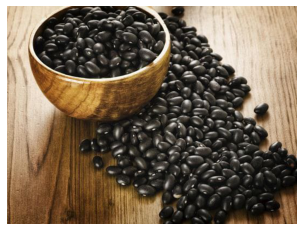


Age: 21
Height: 150 kg
Weight: 50 cm

Acoording to your BMI, you are Healthy
LUNCH DIET PLAN:

1. Name:  Pasta with corn homemade
   Calories:  126 cal
   Fats:  0.7 g
   Protiens:  2.6 g
   Carbohydrates:  28.0 g
   Fibre:  4.8 g


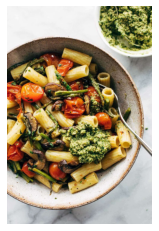

2. Name:  Idli
   Calories:  156 cal
   Fats:  1.7 g
   Protiens:  5.0 g
   Carbohydrates:  30.2 g
   Fibre:  2.1 g


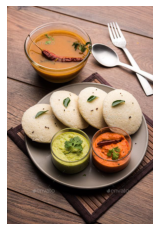

3. Name:  Barley
   Calories:  116 cal
   Fats:  0.38 g
   Protiens:  9.02 g
   Carbohydrates:  20.13 g
   Fibre:  7.9 g


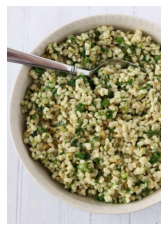


Age: 21
Height: 150 kg
Weight: 50 cm

Acoording to your BMI, you are Healthy
DINNER DIET PLAN:

1. Name:  Honey
   Calories:  304 cal
   Fats:  0.0 g
   Protiens:  0.3 g
   Carbohydrates:  82.0 g
   Fibre:  0.2 g


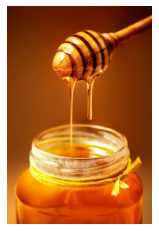

In [36]:
main_win = Tk()

Label(main_win,text="Age").grid(row=0,column=0,sticky=W,pady=4)
Label(main_win,text="Height (in cm)").grid(row=1,column=0,sticky=W,pady=4)
Label(main_win,text="Weight (in kg)").grid(row=2,column=0,sticky=W,pady=4)

e1 = Entry(main_win)
e2 = Entry(main_win)
e3 = Entry(main_win)

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)

Label(main_win,text="Food consumed").grid(row=3,column=0,sticky=W,pady=4)
e4 = Entry(main_win)
e4.grid(row=3, column=1)

Button(main_win,text='Breakfast',command=breakfastRecommender).grid(row=4,column=0,sticky=W,pady=4)
Button(main_win,text='Lunch',command=lunchRecommender).grid(row=4,column=1,sticky=W,pady=4)
Button(main_win,text='Dinner',command=dinnerRecommender).grid(row=4,column=2,sticky=W,pady=4)
main_win.geometry("400x200")
main_win.wm_title("DIET RECOMMENDATION SYSTEM")

main_win.mainloop()